In [83]:
import pandas as pd

fixtures = pd.read_csv('../CSV/10.02.2026/fixtures_rows(1).csv')
predictions = pd.read_csv('../CSV/10.02.2026/predictions_rows.csv')
profiles = pd.read_csv('../CSV/19.01.2026/profiles.csv')
game_weeks = pd.read_csv('../CSV/10.02.2026/game_weeks_rows.csv')

# Convert date columns to datetime format
fixtures['created_at'] = pd.to_datetime(fixtures['created_at'])
predictions['created_at'] = pd.to_datetime(predictions['created_at'])
predictions['updated_at'] = pd.to_datetime(predictions['updated_at'], format='mixed')
game_weeks['predictions_open'] = pd.to_datetime(game_weeks['predictions_open'])
game_weeks['predictions_close'] = pd.to_datetime(game_weeks['predictions_close'])
game_weeks['live_start'] = pd.to_datetime(game_weeks['live_start'])
game_weeks['live_end'] = pd.to_datetime(game_weeks['live_end'])
game_weeks['created_at'] = pd.to_datetime(game_weeks['created_at'])

# Merge predictions with profiles on user_id
merged = predictions.merge(profiles, left_on='user_id', right_on='id', how='left', suffixes=('_pred', '_profile'))

# Merge with fixtures on fixture_id
merged = merged.merge(fixtures, left_on='fixture_id', right_on='id', how='left', suffixes=('', '_fixture'))

# Merge with game_weeks on game_week_id
all_data = merged.merge(game_weeks, left_on='game_week_id', right_on='id', how='left', suffixes=('', '_game_week'))

all_data.head()

,id_pred,user_id,fixture_id,home_prediction,away_prediction,created_at,updated_at,id_profile,username,is_host,...,away_score,created_at_fixture,id_game_week,season_id,week_number,predictions_open,predictions_close,live_start,live_end,created_at_game_week
0,0002aa63-df75-40cb-b4a8-567cf7a2d868,3d18f1c8-de23-4c6d-b843-8241da5d994e,2609cb03-f16f-449d-8935-1a305eb7590c,0,2,2025-12-29 01:22:50.943946+00:00,2025-12-29 01:22:50.835000+00:00,3d18f1c8-de23-4c6d-b843-8241da5d994e,🍺The Barman,True,...,3.0,2025-12-29 01:19:48.270031+00:00,b8e9c830-4504-4e15-9aba-2cf1e3b2de9d,27404307-72b4-4518-a32c-ce15384915d9,18,2025-12-28 01:15:00+00:00,2026-01-02 23:59:00+00:00,2026-01-03 11:15:00+00:00,2026-01-04 23:16:00+00:00,2025-12-29 01:19:48.069015+00:00
1,0004f2ab-78fa-419d-894e-ef835a1f2762,ceb258ce-454a-4b5f-9321-73fd28390495,7c6fcd56-7715-42e1-8e67-c426c112fef8,1,2,2025-09-30 10:23:38.999143+00:00,2025-09-30 19:44:34.051000+00:00,ceb258ce-454a-4b5f-9321-73fd28390495,Stephen O,False,...,2.0,2025-09-30 00:40:14.076755+00:00,d77ab4fc-0b5e-46dc-8403-2c02eb802dd6,27404307-72b4-4518-a32c-ce15384915d9,7,2025-09-29 01:35:00+00:00,2025-10-02 22:59:00+00:00,2025-10-03 10:30:00+00:00,2025-10-05 20:00:00+00:00,2025-09-30 00:40:13.853434+00:00
2,000a8955-a583-417f-8bd1-39fcbf90be39,857f0ddb-bbf7-490f-89e7-c393913d1937,920d8483-0bc6-447b-b623-cfd88610f404,1,1,2026-01-02 10:46:48.150588+00:00,2026-01-02 10:46:48.073000+00:00,857f0ddb-bbf7-490f-89e7-c393913d1937,Jim Shirley,False,...,4.0,2025-12-29 01:19:48.270031+00:00,b8e9c830-4504-4e15-9aba-2cf1e3b2de9d,27404307-72b4-4518-a32c-ce15384915d9,18,2025-12-28 01:15:00+00:00,2026-01-02 23:59:00+00:00,2026-01-03 11:15:00+00:00,2026-01-04 23:16:00+00:00,2025-12-29 01:19:48.069015+00:00
3,000b768b-2b9d-4eaa-b267-30e63acd74b8,584d969b-f2c5-4e89-a226-9d5d47bebe23,5027c125-11c7-47db-bff4-7feed614ca7a,1,3,2025-08-19 10:20:56.427118+00:00,2025-08-19 10:20:56.256000+00:00,584d969b-f2c5-4e89-a226-9d5d47bebe23,Steve arnold,False,...,5.0,2025-08-18 23:36:49.012624+00:00,28c25bca-56fb-487b-b335-f02e00863c6b,27404307-72b4-4518-a32c-ce15384915d9,2,2025-08-18 01:00:00+00:00,2025-08-21 22:59:00+00:00,2025-08-22 01:00:00+00:00,2025-08-25 23:30:00+00:00,2025-08-18 23:36:48.845230+00:00
4,001442d6-0710-48b0-b4f9-b1858e1d4e6b,e2ffaf02-f17f-4be3-b3ee-651d39315af1,ac253518-11bd-4d01-b548-62279fff4ca1,0,2,2025-10-27 08:55:01.221113+00:00,2025-10-30 17:35:42.603000+00:00,e2ffaf02-f17f-4be3-b3ee-651d39315af1,Mjd-⚒️⚒️⚒️,False,...,2.0,2025-10-27 02:20:06.870033+00:00,28da2862-f00a-44dd-8ab5-a48849d53245,27404307-72b4-4518-a32c-ce15384915d9,10,2025-10-26 04:12:00+00:00,2025-10-30 23:59:00+00:00,2025-10-31 02:12:00+00:00,2025-11-03 23:15:00+00:00,2025-10-27 02:20:06.707350+00:00


In [84]:
# Build the simplified dataframe (simple version)
new_df = all_data[[
    'username',
    'created_at',
    'updated_at',
    'predictions_open',
    'predictions_close',
    'created_at_game_week'
]].rename(columns={
    'username': 'player',
    'created_at': 'prediction_created',
    'updated_at': 'prediction_update',
    'predictions_open': 'prediction_open',
    'predictions_close': 'prediction_close',
    'created_at_game_week': 'game_week_created'
})

print(new_df.shape)
new_df.head()

(7930, 6)


,player,prediction_created,prediction_update,prediction_open,prediction_close,game_week_created
0,🍺The Barman,2025-12-29 01:22:50.943946+00:00,2025-12-29 01:22:50.835000+00:00,2025-12-28 01:15:00+00:00,2026-01-02 23:59:00+00:00,2025-12-29 01:19:48.069015+00:00
1,Stephen O,2025-09-30 10:23:38.999143+00:00,2025-09-30 19:44:34.051000+00:00,2025-09-29 01:35:00+00:00,2025-10-02 22:59:00+00:00,2025-09-30 00:40:13.853434+00:00
2,Jim Shirley,2026-01-02 10:46:48.150588+00:00,2026-01-02 10:46:48.073000+00:00,2025-12-28 01:15:00+00:00,2026-01-02 23:59:00+00:00,2025-12-29 01:19:48.069015+00:00
3,Steve arnold,2025-08-19 10:20:56.427118+00:00,2025-08-19 10:20:56.256000+00:00,2025-08-18 01:00:00+00:00,2025-08-21 22:59:00+00:00,2025-08-18 23:36:48.845230+00:00
4,Mjd-⚒️⚒️⚒️,2025-10-27 08:55:01.221113+00:00,2025-10-30 17:35:42.603000+00:00,2025-10-26 04:12:00+00:00,2025-10-30 23:59:00+00:00,2025-10-27 02:20:06.707350+00:00


In [85]:
# Fastest players by average time-to-predict (minutes)
speed_df = new_df.copy()

# Remove test player
speed_df = speed_df[speed_df['player'] != 'Martinez']

# Ensure datetime types
speed_df['prediction_created'] = pd.to_datetime(speed_df['prediction_created'])
speed_df['game_week_created'] = pd.to_datetime(speed_df['game_week_created'])

# Time difference in minutes
speed_df['time_to_predict_min'] = (
    speed_df['prediction_created'] - speed_df['game_week_created']
).dt.total_seconds() / 60

# Average per player and sort fastest first
fastest_players = (
    speed_df.groupby('player', as_index=False)['time_to_predict_min']
    .mean()
    .sort_values('time_to_predict_min')
)

# Format duration as "X Hours, Y Minutes and Z Seconds"
def format_duration_minutes(minutes):
    total_seconds = int(round(minutes * 60))
    hours, remainder = divmod(total_seconds, 3600)
    mins, secs = divmod(remainder, 60)
    return f"{hours} Hours, {mins} Minutes and {secs} Seconds"

fastest_display = fastest_players.copy()
fastest_display['average time to get scores in'] = fastest_display['time_to_predict_min'].apply(format_duration_minutes)
fastest_display = fastest_display.drop(columns=['time_to_predict_min'])
fastest_display = fastest_display.rename(columns={'player': 'Player'})

# Reset index to start at 1
fastest_display.index = range(1, len(fastest_display) + 1)

# Display the dataframe with better formatting
styled_df = fastest_display.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('border', '1px solid black'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('border', '1px solid black'), ('color', '#1a1a1a'), ('padding', '8px')]},
    {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#F2F2F2'), ('color', '#1a1a1a')]},
    {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', '#FFFFFF'), ('color', '#1a1a1a')]}
    ])

display(styled_df)

,Player,average time to get scores in
1,🍺The Barman,"5 Hours, 47 Minutes and 20 Seconds"
2,Parish,"11 Hours, 37 Minutes and 1 Seconds"
3,Mjd-⚒️⚒️⚒️,"12 Hours, 16 Minutes and 50 Seconds"
4,Steve arnold,"19 Hours, 36 Minutes and 37 Seconds"
5,Stephen O,"20 Hours, 59 Minutes and 31 Seconds"
6,Nick Arnold,"22 Hours, 50 Minutes and 45 Seconds"
7,Phil Huffer,"30 Hours, 12 Minutes and 49 Seconds"
8,Jack Massie,"31 Hours, 13 Minutes and 52 Seconds"
9,Gerard,"33 Hours, 54 Minutes and 47 Seconds"
10,Graham Dongworth,"35 Hours, 50 Minutes and 59 Seconds"


In [86]:
# Merge in season scores and add league position
season_scores = pd.read_csv('../CSV/10.02.2026/season_scores_rows.csv')

# Use the latest season from game_weeks
latest_season_id = game_weeks.sort_values('created_at')['season_id'].iloc[-1]
season_scores_latest = season_scores[season_scores['season_id'] == latest_season_id]

# Build season stats dataframe
season_stats = season_scores_latest[[
    'player_id',
    'points',
    'correct_scores'
]].merge(
    profiles[['id', 'username']],
    left_on='player_id',
    right_on='id',
    how='left'
).rename(columns={
    'username': 'Player',
    'points': 'Points',
    'correct_scores': 'Correct Scores'
})[['Player', 'Points', 'Correct Scores']]

# Calculate league position (sorted by Points desc, then Correct Scores desc)
season_stats = season_stats.sort_values(['Points', 'Correct Scores'], ascending=[False, False])
season_stats['rank'] = season_stats[['Points', 'Correct Scores']].apply(tuple, axis=1).rank(method='min', ascending=False).astype(int)

# Format rank as ordinals (1st, 2nd, 3rd, etc.)
def ordinal(n):
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"

season_stats['League Position'] = season_stats['rank'].apply(ordinal)
season_stats = season_stats.drop(columns=['rank'])

# Merge with fastest_display
final_fastest = fastest_display.merge(season_stats, on='Player', how='left')
final_fastest = final_fastest[['Player', 'League Position', 'Points', 'Correct Scores', 'average time to get scores in']]
final_fastest.index = range(1, len(final_fastest) + 1)

# Display styled table
styled_with_stats = final_fastest.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('border', '1px solid black'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('border', '1px solid black'), ('color', '#1a1a1a'), ('padding', '8px')]},
    {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#F2F2F2'), ('color', '#1a1a1a')]},
    {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', '#FFFFFF'), ('color', '#1a1a1a')]}
])

display(styled_with_stats)

,Player,League Position,Points,Correct Scores,average time to get scores in
1,🍺The Barman,3rd,178,32,"5 Hours, 47 Minutes and 20 Seconds"
2,Parish,17th,148,17,"11 Hours, 37 Minutes and 1 Seconds"
3,Mjd-⚒️⚒️⚒️,5th,162,23,"12 Hours, 16 Minutes and 50 Seconds"
4,Steve arnold,24th,141,14,"19 Hours, 36 Minutes and 37 Seconds"
5,Stephen O,9th,156,24,"20 Hours, 59 Minutes and 31 Seconds"
6,Nick Arnold,4th,166,21,"22 Hours, 50 Minutes and 45 Seconds"
7,Phil Huffer,6th,160,23,"30 Hours, 12 Minutes and 49 Seconds"
8,Jack Massie,13th,153,19,"31 Hours, 13 Minutes and 52 Seconds"
9,Gerard,1st,187,32,"33 Hours, 54 Minutes and 47 Seconds"
10,Graham Dongworth,22nd,144,17,"35 Hours, 50 Minutes and 59 Seconds"


C:\Users\gavin\AppData\Local\Temp\ipykernel_18688\3558918570.py:30: UserWarning: Glyph 127866 (\N{BEER MUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\gavin\anaconda3\envs\predictions_data\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127866 (\N{BEER MUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


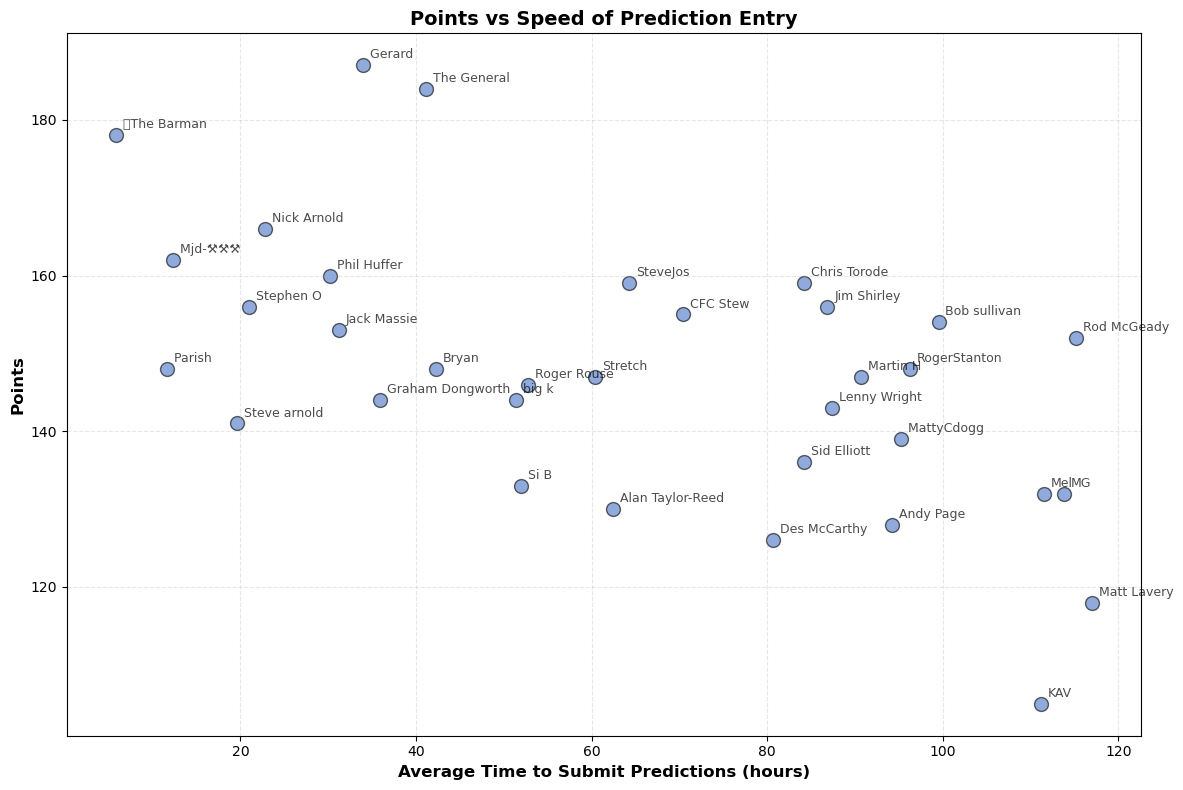

In [87]:
# Create scatter plot of Points vs Average Time to Predict
import matplotlib.pyplot as plt

# Prepare data for plotting
plot_data = final_fastest.copy()

# Convert time back to minutes for x-axis
plot_data['time_minutes'] = fastest_players.set_index('player')['time_to_predict_min'].reindex(plot_data['Player']).values

# Convert time to hours for better readability
plot_data['time_hours'] = plot_data['time_minutes'] / 60

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_data['time_hours'], plot_data['Points'], 
           s=100, alpha=0.6, c='#4472C4', edgecolors='black', linewidth=1)

# Add player labels to each point
for idx, row in plot_data.iterrows():
    plt.annotate(row['Player'], 
                (row['time_hours'], row['Points']),
                xytext=(5, 5), textcoords='offset points', 
                fontsize=9, alpha=0.7)

# Formatting
plt.xlabel('Average Time to Submit Predictions (hours)', fontsize=12, fontweight='bold')
plt.ylabel('Points', fontsize=12, fontweight='bold')
plt.title('Points vs Speed of Prediction Entry', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## Export Results

In [88]:
from datetime import datetime

# Generate filename with today's date (DDMMYY format)
date_str = datetime.now().strftime('%d%m%y')

# Export scatter plot
scatter_filename = f'SpeedScatter{date_str}.png'
scatter_filepath = f'../Output/{scatter_filename}'

plt.figure(figsize=(12, 8))
plt.scatter(plot_data['time_hours'], plot_data['Points'], 
           s=100, alpha=0.6, c='#4472C4', edgecolors='black', linewidth=1)

for idx, row in plot_data.iterrows():
    plt.annotate(row['Player'], 
                (row['time_hours'], row['Points']),
                xytext=(5, 5), textcoords='offset points', 
                fontsize=9, alpha=0.7)

plt.xlabel('Average Time to Submit Predictions (hours)', fontsize=12, fontweight='bold')
plt.ylabel('Points', fontsize=12, fontweight='bold')
plt.title('Points vs Speed of Prediction Entry', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig(scatter_filepath, dpi=300, bbox_inches='tight')
plt.close()

print(f"✓ Scatter plot exported to: {scatter_filepath}")

# Export table as image
table_filename = f'speedTable{date_str}.png'
table_filepath = f'../Output/{table_filename}'

fig, ax = plt.subplots(figsize=(18, 12))
ax.axis('off')

# Create table from final_fastest
table_data = final_fastest.reset_index(drop=True)
table_data.index = range(1, len(table_data) + 1)

table = ax.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.12, 0.12, 0.08, 0.12, 0.30]
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)

# Style header
for i in range(len(table_data.columns)):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(table_data) + 1):
    for j in range(len(table_data.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#F2F2F2')
        else:
            table[(i, j)].set_facecolor('#FFFFFF')
        table[(i, j)].set_edgecolor('black')
        table[(i, j)].set_linewidth(0.5)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.savefig(table_filepath, dpi=300, bbox_inches='tight')
plt.close()

print(f"✓ Table exported to: {table_filepath}")
print(f"\n✓ Both files ready to share!")

C:\Users\gavin\AppData\Local\Temp\ipykernel_18688\3267934053.py:24: UserWarning: Glyph 127866 (\N{BEER MUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gavin\AppData\Local\Temp\ipykernel_18688\3267934053.py:25: UserWarning: Glyph 127866 (\N{BEER MUG}) missing from font(s) DejaVu Sans.
  plt.savefig(scatter_filepath, dpi=300, bbox_inches='tight')


✓ Scatter plot exported to: ../Output/SpeedScatter120226.png


C:\Users\gavin\AppData\Local\Temp\ipykernel_18688\3267934053.py:69: UserWarning: Glyph 127866 (\N{BEER MUG}) missing from font(s) DejaVu Sans.
  plt.savefig(table_filepath, dpi=300, bbox_inches='tight')


✓ Table exported to: ../Output/speedTable120226.png

✓ Both files ready to share!
